# Ecuación de cable

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib inline

![title](cable.png)

Resolviendo el circuito, se obtiene la siguiente ecuación

\begin{equation}
\tau \frac{\partial V}{\partial t} = \lambda^2 \frac{\partial^2 V}{\partial x^2}-V
\end{equation}

Donde 

\begin{equation}
\lambda=\sqrt{\frac{a R_m}{2 R_l}}
\end{equation}

\begin{equation}
\tau=c_m R_m
\end{equation}

Tomando el caso cuando el voltaje es estable temporalmente ($t\to \infty$) se simplifica a:

\begin{equation}
 \lambda^2 \frac{\partial^2 V}{\partial x^2}=V
\end{equation}

Con condición inicial

\begin{equation}
I_0 = \frac{-\pi a^2}{r_l}\frac{\partial V_0}{\partial x}
\end{equation}

Obtendiendo la solución:

\begin{equation}
V(x)=\frac{\lambda r_l I_0}{\pi a^2}e^{\frac{-x}{\lambda}}
\end{equation}

In [98]:
#Generamos un vector x
long=np.linspace(0,10,1000)

#Definimos la función
def voltage(x,a=1,b=1):
    return a*np.exp(-x/b)

#Evaluamos la función
v=voltage(long)

Text(0.5,1,'Voltaje a lo largo del cable')

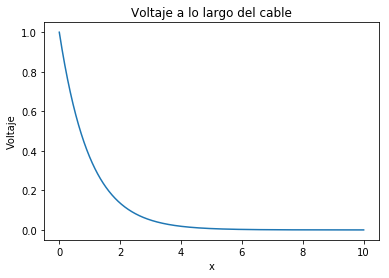

In [99]:
plt.plot(long,v)
plt.xlabel('x')
plt.ylabel('Voltaje')
plt.legend()
plt.title('Voltaje a lo largo del cable')

# Método de Euler 
Dada una ecuación diferencial 

\begin{equation}
\frac{dx}{dt}=f(x,t; parámetros)
\end{equation}

Con valor inicial 

\begin{equation}
x(t_0)=x_0
\end{equation}

Se puede aproximar la derivada como:

\begin{equation}
\frac{dx}{dt}\simeq \frac{x(t+h)-x(t)}{h}
\end{equation}

Donde h es el tamaño del paso y por lo tanto despejando $x(t+h)$ tenemos:

\begin{equation}
x(t+h) \simeq x(t+h)\frac{dx}{dt}=x(t)+hf(x,t)
\end{equation}

Podemos aproximar la solución de la forma:

\begin{equation}
x_{n+1}= x_n +hf(x_n,t_n)
\end{equation}

# Aproximación


Reescribiendo la ecuación:

\begin{equation}
\lambda^2 \frac{\partial^2 V}{\partial x^2}=V
\end{equation}

Como un sistema de ecuaciones de primer orden:
    
definimos:
$$z= V(x)$$ 
$$w=\frac{dV(x)}{dx}$$ 

$$\to$$

$$\frac{dz(x)}{dx}=\frac{dV(x)}{dx}= w(x)$$
$$\frac{dw(x)}{dx}=\frac{d^2 V(x)}{dx^2}=\frac{V}{\lambda^2}=\frac{z(x)}{\lambda^2}$$

$$\to$$

$$\frac{dz(x)}{dx}=w(x)$$
$$\frac{dw(x)}{dx}=\frac{z(x)}{\lambda^2}$$

Con la condición inicial de:

\begin{equation}
I_0 = \frac{-\pi a^2}{r_l}\frac{\partial V_0}{\partial x}
\end{equation}

$$\to$$

\begin{equation}
w(0)=\frac{\partial V_0}{\partial x} = \frac{-r_l I_0}{\pi a^2}
\end{equation}





In [96]:
def dz(z,w,l):
    return w
def dw(z,w,l):
    return z/(l**2)

dt1=0.01

# Integramos usando el método de Euler  

def euler(dz,dw,dt):
    x=np.linspace(0,10,1000)
    z=np.zeros(len(x))
    w=np.zeros(len(x))
    z[0]=1
    w[0]=-1
    l=1
    for i in range(0,len(x)-1):
        z[i+1] = z[i] + dz(z[i],w[i],l)*dt
        w[i+1] = w[i] + dw(z[i],w[i],l)*dt
    return x,z

Text(0.5,1,'')

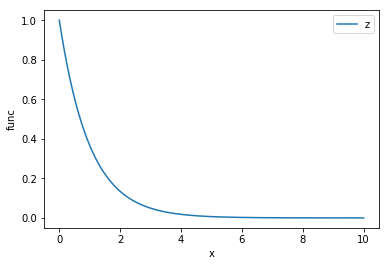

In [97]:
x,z=euler(dz,dw,dt1)
plt.plot(x, z)
#plt.plot(x,w, label="w")
plt.xlabel('x')
plt.ylabel('func')
plt.legend()
plt.title('')

Comparando la solución original con las soluciones dadas por diferentes "dt"

In [134]:
dt0=0.1
dt1=0.06
dt2=0.03
dt3=0.015

x0,z0=euler(dz,dw,dt0)
x1,z1=euler(dz,dw,dt1)
x2,z2=euler(dz,dw,dt2)
x3,z3=euler(dz,dw,dt3)


long=np.linspace(0,10,1000)
def voltage(x,a=1,b=1):
    return a*np.exp(-x/b)
v=voltage(long)

Text(0.5,1,'Voltaje a lo largo del cable')

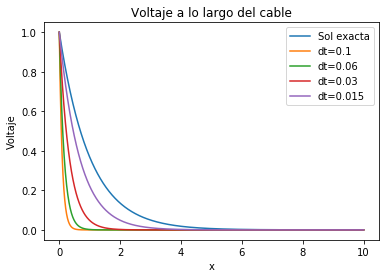

In [135]:
plt.plot(long,v,label='Sol exacta')
plt.plot(x0,z0,label='dt=0.1')
plt.plot(x1,z1,label='dt=0.06')
plt.plot(x2,z2,label='dt=0.03')
plt.plot(x3,z3,label='dt=0.015')
plt.xlabel('x')
plt.ylabel('Voltaje')
plt.legend()
plt.title('Voltaje a lo largo del cable')